#流失用户预测分析项目组

# 项目目标

Task1
任务：用户历史数据，挖掘潜在趋势，以及与流失相关的因子与客群画像。

目的：针对流失行为下钻，刻画流失趋势与重要因子，协助企业进行更深入的用户理解。

Task2
任务：使用机器学习算法搭建预测分析模型，基于用户基础属性及行为画像，针对高意向流失用户客群进行识别预测。

目的：协助产品运营精准定位潜流失人群，以进行提前召回，提升后续留存。

-- 项目全链路思路 --

1. 探索性分析

     1.1 数据质量检查

   - 查看数据结构与变量属性
   - 检查数据质量、缺失值和潜在数据问题

    1.2 数据分析与洞察

   - 分析变量分布，查看是否存在分布异常
   - 分析变量之间的关系（相关性分析以及趋势分析）
   - 通过可视化展现客户行为和特征

2. 数据预处理（数据清理和特征工程）
   - 处理缺失值、将变量转换为适当的数据类型、数据清洗
   - 特征选择


3. 机器学习预测分析：

   - 搭建模型识别流失用户   
   - 模型表现的评估与选择

# 数据理解

In [20]:
# 读入需要的Python库
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# 读入数据集
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head(8)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93


In [22]:
# 查看数据集各特征的数据属性，以及缺失情况
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [23]:
# 查看类别型变量的：独特值个数、最高频率值及其频次、缺失值占比
df.select_dtypes(include=['O']).describe().T\
    .assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/len(x)))

,count,unique,top,freq,missing_pct
PreferredLoginDevice,5630,3,Mobile Phone,2765,0.0
PreferredPaymentMode,5630,7,Debit Card,2314,0.0
Gender,5630,2,Male,3384,0.0
PreferedOrderCat,5630,6,Laptop & Accessory,2050,0.0
MaritalStatus,5630,3,Married,2986,0.0


In [24]:
# 查看类别型变量的各类别细节
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'Unique values in column {col}: {df[col].unique()}')

Unique values in column PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
Unique values in column PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Unique values in column Gender: ['Female' 'Male']
Unique values in column PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unique values in column MaritalStatus: ['Single' 'Divorced' 'Married']


# 1. 探索性分析

## 1.1 性别与流失

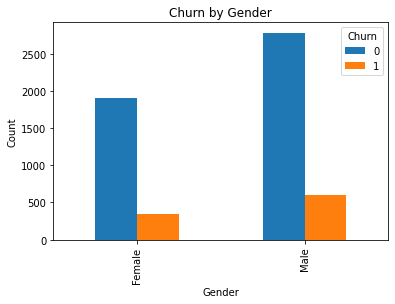

In [25]:
grouped = df.groupby(['Gender', 'Churn']).count()['CustomerID']

grouped.unstack().plot(kind='bar', stacked=False)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn by Gender')

plt.show()

由上可见，男性女性的流失人群占比（流失率）并无明显差异

## 1.2 查看用户总年限与流失的关系（Tenure口径为注册日距今时长）

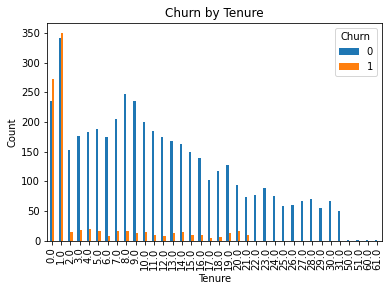

In [26]:
grouped = df.groupby(['Tenure', 'Churn']).count()['CustomerID']

# 柱状图
grouped.unstack().plot(kind='bar', stacked=False)

# 加标签
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churn by Tenure')

plt.show()

图中可见，用户年限越高的用户，流失率明显下降。 其中需要注意的是，用户在注册当日及次日的流失率都在一半左右，需要及时介入，查看是否由于新客体验不佳，或其他产品刚性原因造成

## 1.3 用户首选支付方式与流失的关系

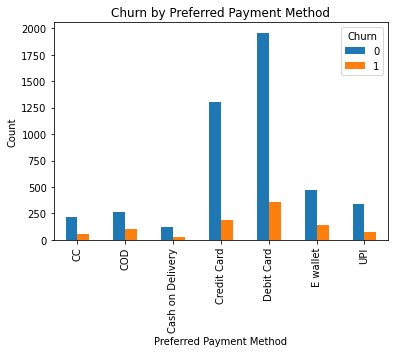

In [27]:
grouped = df.groupby(['PreferredPaymentMode', 'Churn']).count()['CustomerID']
grouped.unstack().plot(kind='bar', stacked=False)

#加标题标签
plt.xlabel('Preferred Payment Method')
plt.ylabel('Count')
plt.title('Churn by Preferred Payment Method')

plt.show()

由图可见，默认支付方式为银行卡的用户流失率远低于其他支付方式。

# 2. 数据清洗与特征筛选

### 缺失值的处理

In [28]:
# 查看各特征的缺失情况，加总
print(df.isnull().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [29]:
# 使用众数填补缺失值
df = df.fillna(df.mode().iloc[0])

In [30]:
# 再次查看缺失情况，确保缺失值已都被填补
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### 相关性分析矩阵

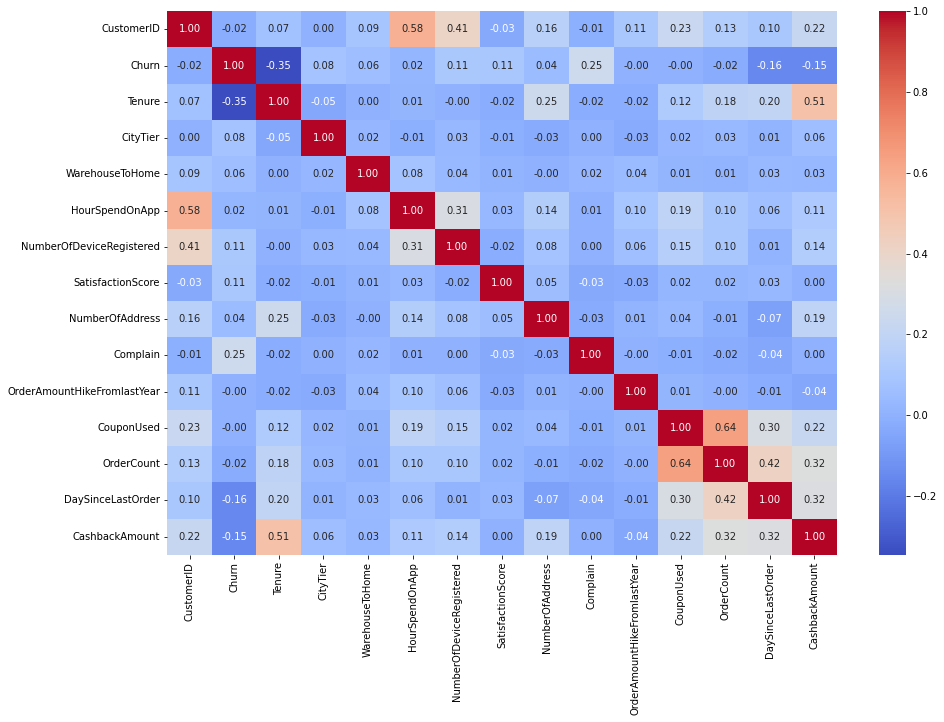

In [31]:
list_num = df.select_dtypes(['float64','int64']).columns
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = sns.heatmap(df[list_num].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [32]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,1.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,1.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


趋势与相关性洞察：
 1. 由相关性系数矩阵可见，「过去是否有券核销」、「用户所获返现」与「订单总量」，「最近一次消费间隔」均有较强相关性：
 有券核销行为的用户订单总量越多，发券手段对于促支付促活跃均有较明显的效果，需要持续引导用户核销券；
 用户收到的返现激励越高，也越倾向于持续活跃在平台；
 
 2. 用户总年限与流失率负相关，用户若能在首周决定续订，后续的流失率则显著下降。因此提升用户体验初期的满意度十分重要。 

### 离散/类别型变量的处理

利用卡方检验进行特征筛选： 查看两个类别变量的依赖性

In [33]:
from scipy.stats import chi2_contingency

cat_features = df.select_dtypes(include=['object']).columns

for feature in cat_features:
    cross_tab = pd.crosstab(df[feature], df['Churn'])
    stat, p, dof, expected = chi2_contingency(cross_tab)
    print(f"{feature}: Chi-square Statistic = {stat}, p-value = {p}")
    
    alpha = 0.05
    if p > alpha:
        print(f"{feature} is NOT significantly related to churn")
    else:
        print(f"{feature} is significantly related to churn")

PreferredLoginDevice: Chi-square Statistic = 73.53679418373687, p-value = 1.0756922373255213e-16
PreferredLoginDevice is significantly related to churn
PreferredPaymentMode: Chi-square Statistic = 77.89682023026812, p-value = 9.708708511076305e-15
PreferredPaymentMode is significantly related to churn
Gender: Chi-square Statistic = 4.662908495367532, p-value = 0.030820940334890086
Gender is significantly related to churn
PreferedOrderCat: Chi-square Statistic = 288.63939355672443, p-value = 2.7708325346337454e-60
PreferedOrderCat is significantly related to churn
MaritalStatus: Chi-square Statistic = 188.6710396770566, p-value = 1.073011277910542e-41
MaritalStatus is significantly related to churn


卡方检验的结果表明，用户默认设备、用户首选支付方式、性别、偏好商品类别 和婚姻状况都与流失倾向显着相关。（p值远低于0.05阈值，即这些特征与流失有显著关系）

将类别变量转化为数值型变量：

In [34]:
cat_data = df.select_dtypes(include='object')
cat_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [35]:
encoded = pd.get_dummies(cat_data,drop_first=True)
data_enc = pd.concat([df.drop(cat_data.columns, axis=1), encoded], axis=1)
data_enc.drop('CustomerID', axis=1,inplace=True)

用户ID与后续建模无关，可从数据集剔除

# 3. 机器学习预测建模

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from fancyimpute import IterativeImputer

In [38]:
#定义特征与目标变量，并且分训练集与测试集
X=data_enc.drop(['Churn'],axis=1)
y=data_enc['Churn']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#cross validation
skfcv=StratifiedKFold(n_splits=5)

In [39]:
y_train.value_counts()

Churn
0    3746
1     758
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## 模型1:逻辑回归

In [41]:
#搭建逻辑回归模型
log_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('logreg',LogisticRegression())])

#交叉检验模型结果
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Logistic Regression: 0.6269469504799822


Test score for Logistic Regression: 0.622356495468278
Training score for Logistic Regression: 0.6378378378378378


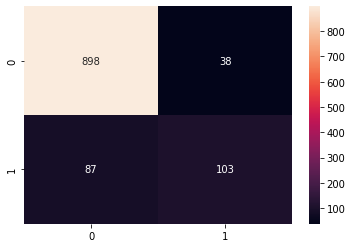

In [43]:
#在验证集上跑模型，得到模型表现
log_pipe.fit(X_train,y_train)
print(f"Test score for Logistic Regression: {f1_score(y_test, log_pipe.predict(X_test))}")
print(f"Training score for Logistic Regression: {f1_score(y_train, log_pipe.predict(X_train))}")
log_mat = confusion_matrix(y_test, log_pipe.predict(X_test))
sns.heatmap(log_mat, annot=True,fmt="g")
plt.show()

## 模型2: LDA

In [45]:
#搭建LDA模型
lda_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('lda',LinearDiscriminantAnalysis())])

#交叉检验并得到模型结果
print(f"Cross validation score for LinearDiscriminantAnalysis: {np.mean(cross_val_score(lda_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for LinearDiscriminantAnalysis: 0.5963151810090649


Test score for LinearDiscriminantAnalysis: 0.6018808777429467
Training score for LinearDiscriminantAnalysis: 0.6047619047619047


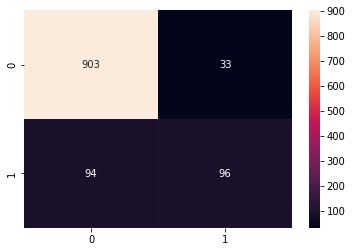

In [46]:
#在验证集上跑模型，得到模型表现
lda_pipe.fit(X_train,y_train)
print(f"Test score for LinearDiscriminantAnalysis: {f1_score(y_test, lda_pipe.predict(X_test))}")
print(f"Training score for LinearDiscriminantAnalysis: {f1_score(y_train, lda_pipe.predict(X_train))}")
lda_mat = confusion_matrix(y_test, lda_pipe.predict(X_test))
sns.heatmap(lda_mat, annot=True,fmt="g")
plt.show()

## 模型3: 随机森林

In [48]:
#搭建随机森林
rf_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('rfmodel',RandomForestClassifier())])

#交叉检验
print(f"Cross validation score for Random Forest: {np.mean(cross_val_score(rf_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Random Forest: 0.8681619152601833


Test score for Random Forest: 0.8693181818181818
Training score for Random Forest: 1.0


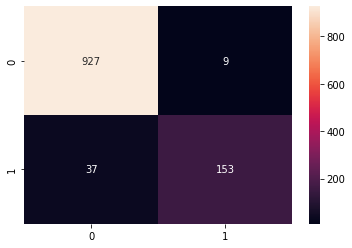

In [49]:
##在验证集上跑模型，得到模型表现
rf_pipe.fit(X_train,y_train)
print(f"Test score for Random Forest: {f1_score(y_test, rf_pipe.predict(X_test))}")
print(f"Training score for Random Forest: {f1_score(y_train, rf_pipe.predict(X_train))}")
rf_mat = confusion_matrix(y_test, rf_pipe.predict(X_test))
sns.heatmap(rf_mat, annot=True,fmt="g")
plt.show()

## 模型4： XGboost模型

In [51]:
#搭建XGboost模型
xgb_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('xgb',XGBClassifier(verbosity=0,use_label_encoder=False))])

#交叉检验
print(f"Cross validation score for XGBoost: {np.mean(cross_val_score(xgb_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mac

Cross validation score for XGBoost: 0.8911304623779406


Test score for XGBoost: 0.928
Training score for XGBoost: 1.0


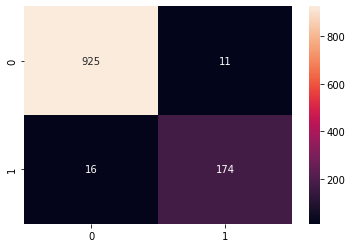

In [52]:
#在验证集上跑模型得到模型结果
xgb_pipe.fit(X_train,y_train)
print(f"Test score for XGBoost: {f1_score(y_test, xgb_pipe.predict(X_test))}")
print(f"Training score for XGBoost: {f1_score(y_train, xgb_pipe.predict(X_train))}")
xgb_mat = confusion_matrix(y_test, xgb_pipe.predict(X_test))
sns.heatmap(xgb_mat, annot=True, fmt="g")
plt.show()

In [54]:
# 得到结论：……
# 最终选用模型：……